# AI TASK-5

<hr>

### BATTULA BHAVANA
### CH.EN.U4AIE21010

<h2>Preprocessing</h2>

In [49]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
from sklearn import preprocessing

In [50]:
data = load_dataset("titanic")
data.info()

encoder = preprocessing.LabelEncoder()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [51]:
def preprocess(data, isTest):
    try:
        # Remove useless columns
        data = data.drop(['class', 'who', 'adult_male', 'deck', 'alive', 'alone', 'embark_town'], axis=1)
        # if isTest:
            # data = data.drop(['Survived'], axis = 1)
        # Filling empty numerical values with median
        data['age'] = data['age'].fillna(data['age'].median())
        data['fare'] = data['fare'].fillna(data['fare'].median())
        # Filling empty embarked with S
        data['embarked'] = data['embarked'].fillna('S')
        # Replacing categorical sex with integer values (0 for F and 1 for M)
        data['sex'] = encoder.fit_transform(data['sex'])
    except KeyError as e:
        print('Preprocess Failed!!')
        print(e)
    # Returning preprocessed data
    return data


In [52]:
data2 = preprocess(data, True)
data2.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
5,0,3,1,28.0,0,0,8.4583,Q
6,0,1,1,54.0,0,0,51.8625,S
7,0,3,1,2.0,3,1,21.0750,S
8,1,3,0,27.0,0,2,11.1333,S
9,1,2,0,14.0,1,0,30.0708,C


In [53]:
data3 = preprocess(data, False)
data3 = data3.drop(['survived'], axis=1)
data3.head(10)

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S
5,3,1,28.0,0,0,8.4583,Q
6,1,1,54.0,0,0,51.8625,S
7,3,1,2.0,3,1,21.0750,S
8,3,0,27.0,0,2,11.1333,S
9,2,0,14.0,1,0,30.0708,C


In [54]:
# Extracting categorical columns
categorical_cols = [col for col in data2.columns if data2[col].nunique() < 10 and data2[col].dtype == 'object']

# Extracting numerical columns
numerical_cols = [col for col in data2.columns if data2[col].dtype in ['int64', 'float64']]

print(categorical_cols)
print(numerical_cols)

['embarked']
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


In [55]:
data2 = pd.get_dummies(data2)

<h2>1. Logistic Regression</h2>

In [56]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [57]:
x = data2.drop(['survived'], axis=1).values
y = data2['survived'].values

In [58]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

In [60]:
classifier = LogisticRegression(solver='lbfgs',max_iter=3000)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.85%


Text(0.5, 1.0, 'Confusion Matrix')

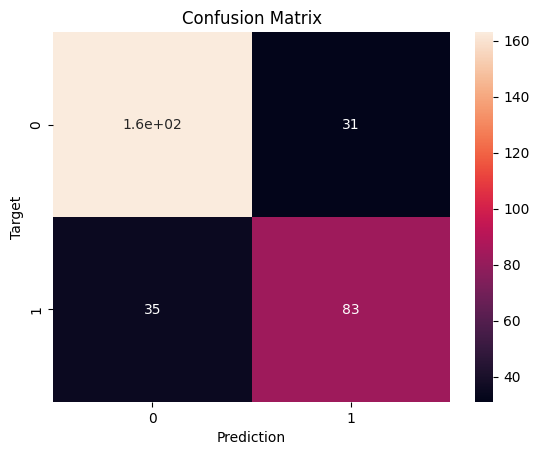

In [62]:
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

<h2>2. Decision Tree</h2>

In [63]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [64]:
x = data2.drop(['survived'], axis=1).values
y = data2['survived'].values

In [65]:
x_train, x_test, y_pred, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

In [66]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 77.56%


Text(0.5, 1.0, 'Confusion Matrix')

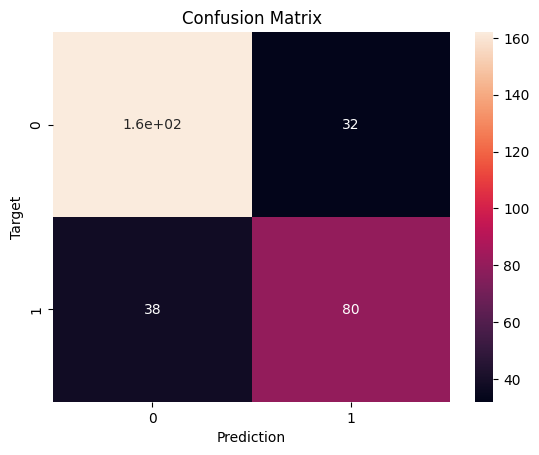

In [67]:
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

<h2>3. Support Vector Regression</h2>

In [68]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [69]:
x = data2.drop(['survived'], axis=1).values
y = data2['survived'].values

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

In [71]:
classifier = SVC()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 69.55%


Text(0.5, 1.0, 'Confusion Matrix')

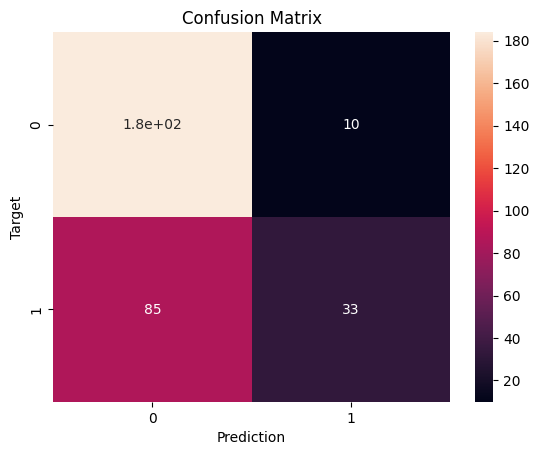

In [72]:
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')